# Titanic - Machine Learning from Desaster

## By Michael Eibner
## Student Data Analyst at Masterschool

# Import

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

## Import Dataset

In [2]:
df = pd.read_csv('train.csv', index_col=0)

# Overview

## Get an overview over the dataset with Pandas functions and looking for missing data

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [18]:
print(df.columns.values)

['Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [6]:
df.shape

(891, 11)

In [19]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<AxesSubplot:>

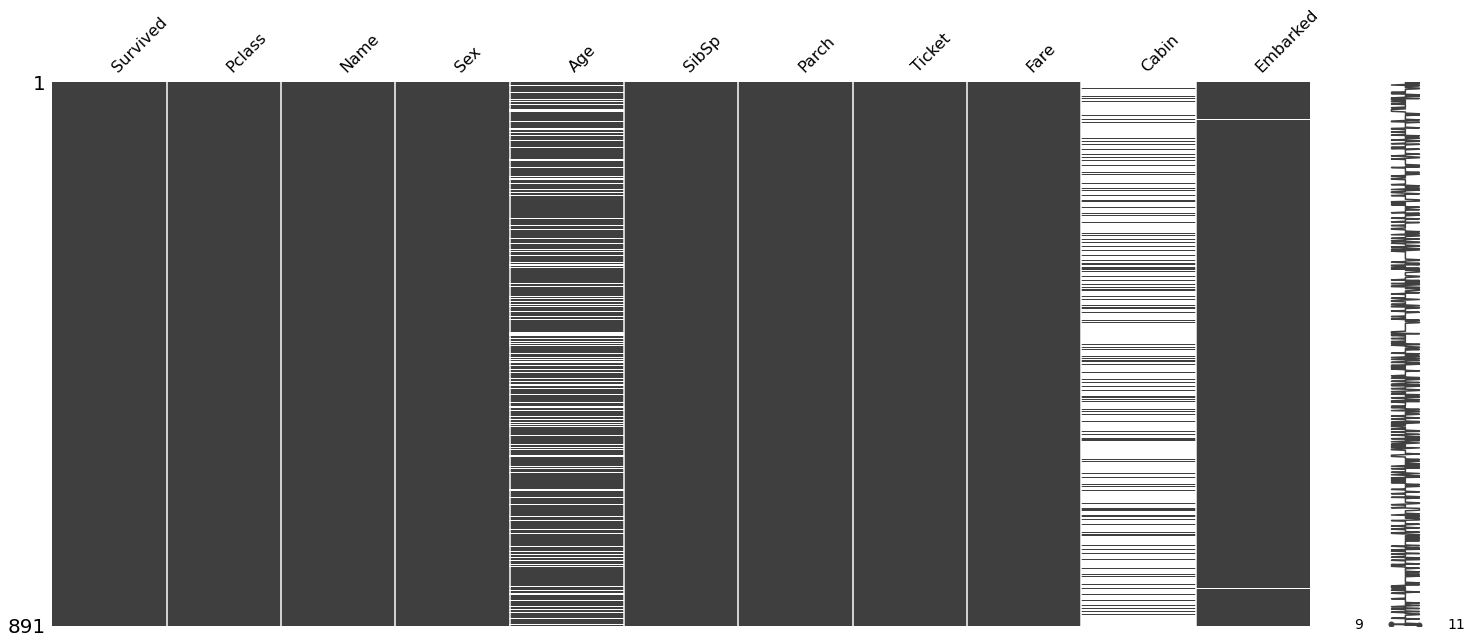

In [7]:
msno.matrix(df)

## What's in the Dataset?

### Rows & Columns:
* 891 Rows
* 12 Columns

### Columns Explanation:

#### PassengerId:
* **The ID of every single passenger.**

#### Survival:
* **Did the passenger survive? 0 = no, 1 = yes**

#### Pclass:
* **The price class of the ticktes. 1 = First class, 2 = Second class, 3 = Third class (1st. class of corse, is the luxury).**

#### Name:
* **The full name incl. title of the passenger.**

#### Sex:
* **The sex of the passenger. Female or male.**

#### Age:
* **The age of the passenger on April the 15th in the year 1912, the day the RMS Titanic sunk. This column contains missing data.**

#### SibSp:
* **Number of siblings or spouses of this passenger were on board.**

#### Parch:
* **Number of children or parents of this passenger were on board.**

#### Ticket:
* **The ticket number / Ticket ID.**

#### Fare:
* **The price the passenger did pay for the ticket.**

#### Cabin:
* **The number of the cabin. This column contains more than 75% missing data.**

#### Embarked:
* **The port of embarkation. S = Southampton, c = Cherbourg, Q = Queenstown, only 2 rows of missing data in this column.**

## What is the RMS Titanic?

The RMS Titanic, from the White Star Line, was a passenger liner from the United Kingdom.

![RMS Titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/800px-RMS_Titanic_3.jpg)
Picture from [Wikipedia](https://en.wikipedia.org/wiki/Titanicf)

The Titanic was completed on April the 2nd 1912 and, back then that year, the biggest ship afloat, with a length of 270 meter, width of 28 meter, and a heigth of 53 meter.

The maiden voyage, April 10th, 1912, was also the last journey of this liner. The route of the Titanic started in the port of Southampton, on the south coast of Hampshire, England. After 80 nautic miles, the Titanic tried to dock in Cherbourg, France, but the ship was too large, so the passengers entered the Titanic by boats. The last port, the Titanic docket was in Queenstown, today called Cobh, in south Ireland. From this port, the Titanic should cross the Atlantic Ocean and arrive on April 17 at the Port of New York.

The shipwreck happened on April 15th, 1912.

# EDA - What Kind of People were more likely survive to the Titanic Sinking?

## Survivors

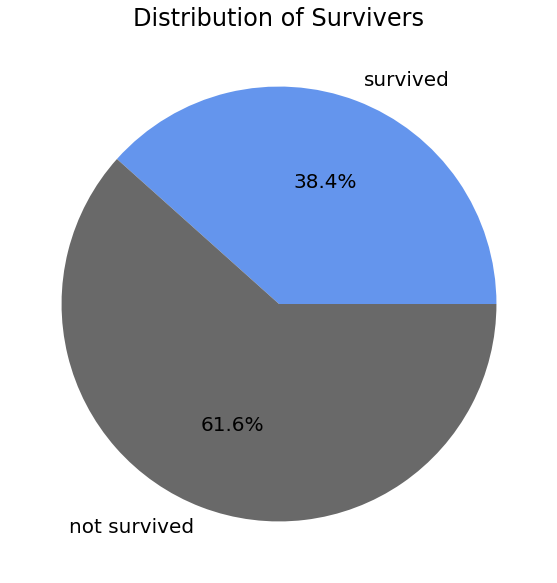

In [8]:
# how many people survived the sinkink? dfs, s for survived, dfd, d for dead... or drowned, you decide.
dfs = df[df['Survived']==1]
dfd = df[df['Survived']==0]

# create a pie chart to see the distribution of survivers
surv_list = [len(dfs), len(dfd)]
surv_label = ['survived', 'not survived']
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams.update({'font.size': 20})
plt.pie(surv_list, labels=surv_label, autopct='%1.1f%%', colors=['cornflowerblue', 'dimgrey'])
plt.title('Distribution of Survivers')
plt.show();

**Almost 40% of the passengers survived the sinking of the Titanic**

## Classes

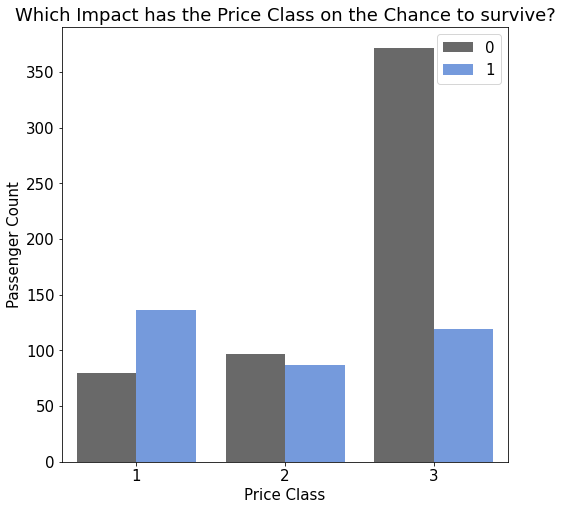

In [9]:
# create a countplot of survivors and classes
plt.rcParams['figure.figsize'] = 8, 8
plt.rcParams.update({'font.size': 15})
ax = sns.countplot(data=df, x='Pclass', hue='Survived', palette=['dimgrey','cornflowerblue'])
plt.title('Which Impact has the Price Class on the Chance to survive?')
plt.ylabel('Passenger Count')
plt.xlabel('Price Class')
ax.legend();

**The higher the class, the better the chance of survival. Maybe the rich and famous could buy seats on the lifeboats?**

## Ticket Prices, Classes and Embarkation
**Let's stay by the amount of money the passengers spent**

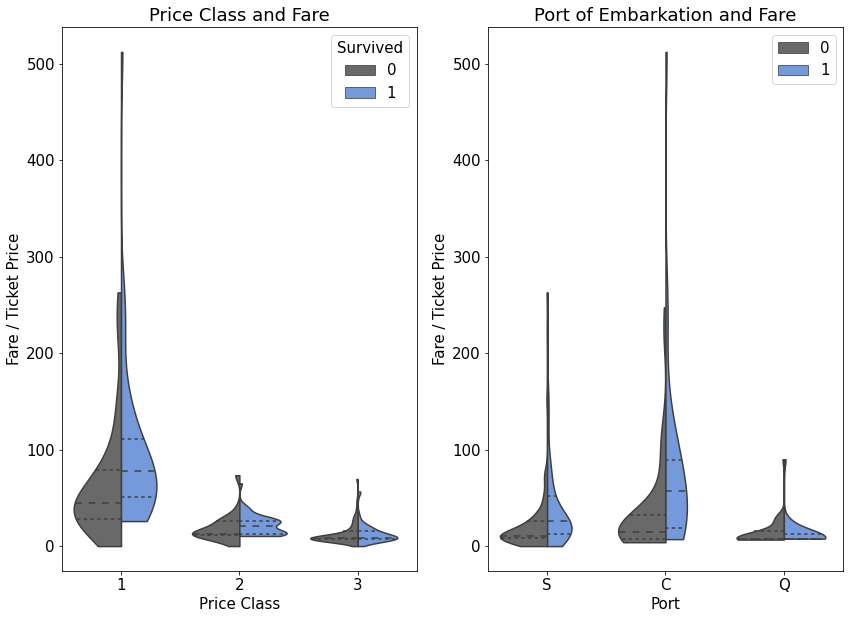

In [10]:
# create a violin plot to see the impact of ticket price and the port of embarkation have on the chance to survive
plt.rcParams['figure.figsize'] = 14, 10
plt.rcParams.update({'font.size': 15})
plt.subplot(1, 2, 1)
ax = sns.violinplot(x='Pclass', y='Fare', hue='Survived', data=df, split=True, palette=['dimgrey','cornflowerblue'], inner='quartile', cut=0)
plt.title('Price Class and Fare')
plt.ylabel('Fare / Ticket Price')
plt.xlabel('Price Class')
plt.subplot(1, 2, 2)
ax = sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=df, split=True, palette=['dimgrey','cornflowerblue'], inner='quartile', cut=0)
plt.title('Port of Embarkation and Fare')
plt.ylabel('Fare / Ticket Price')
plt.xlabel('Port')
plt.legend();

**In this visualization, we can see a lot of things:**
* **There were passengers who didn't pay any fare**
* **As we've seen before, the first class had better chances to survive**
* **In the other 2 classes, the distribution of survival is close to even**
* **There were passengers who pay a disproportionate high fare**
* **There was seemingly a guarantee, if you pay almost 300 dollars, you survive**
* **If you haven't paid anything for your first or second class ticket, you were doomed to die**
* **The most passengers were from Southampton and Cherbourg, only a few were from Queensland**
* **From Queensland, there were the cheaper ones**
* **It seems that the Port of Embarkation is not relevant for the chances to survive**

## Sex and Age

**Male or female? Who has higher chances to survive?**

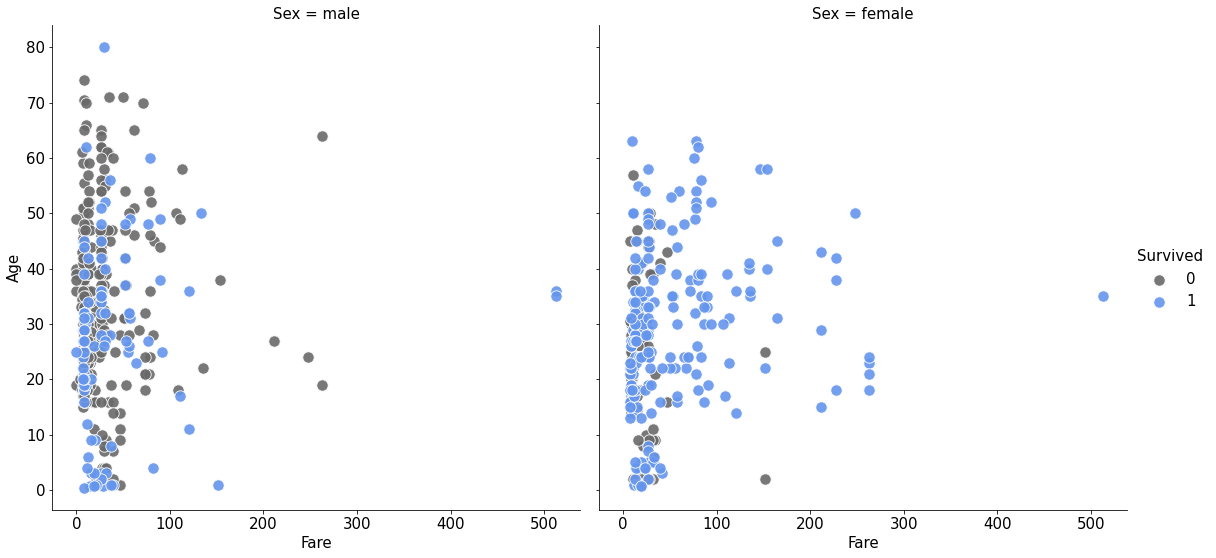

In [11]:
# to compare sex, age, fare and status of survival, create a scatterplot
g = sns.FacetGrid(df, col="Sex", hue="Survived",  height=8, palette=['dimgrey','cornflowerblue'])
g.map(sns.scatterplot, "Fare", "Age", alpha=.9, s=130)
g.add_legend();

**Here we can see, that most of the survivors were female. The principle "women and children first" is not wrong at all. Compared to the violin plot before, we can see, that there were only 3 people who paid a high amount of dollars, and all of them survived. There were 2 relatively expensive children, and the girl died.**

**The oldest person was a male and he survived. There's no significant sign that elder people were specially treated.**

**In the violin plot before, I wrote, that the passengers who didn't pay anything were doomed to die, I would guess it was the staff on the liner. May these heroes rest in peace.**

## Distribution of Age

**Is it better to be older or younger to survive?**

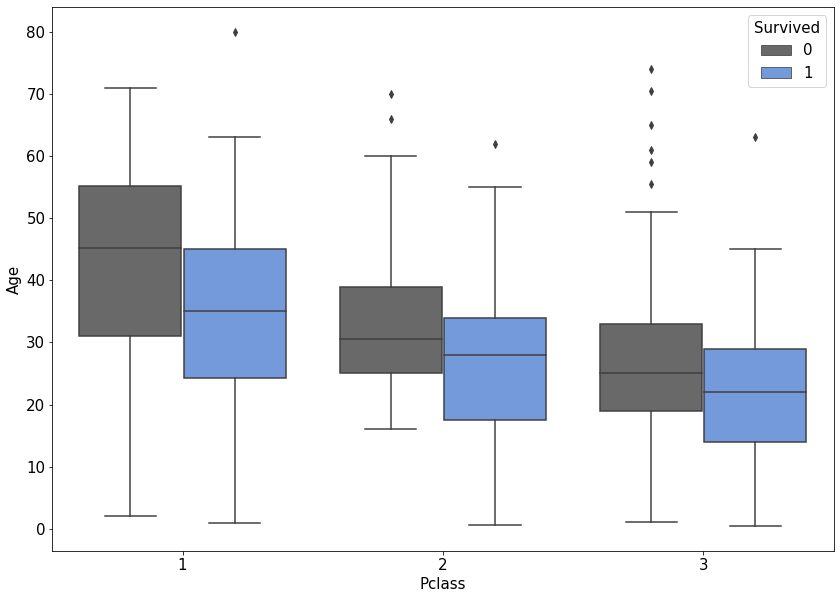

In [12]:
# to get an overview over the chances to survive, let's see the distribution of age
sns.boxplot(data=df, x='Pclass', y='Age', hue='Survived', palette=['dimgrey','cornflowerblue'], width=0.8);

**Either you spent a large amount of money on your ticket or you were very young, if you had neither one nor the other, you had little chance of surviving.**

## Did the lonely sacrifice themselves for families?

**Let's find out, who had better chances to survive - passengers with family, siblings, sprouts, or singles.**

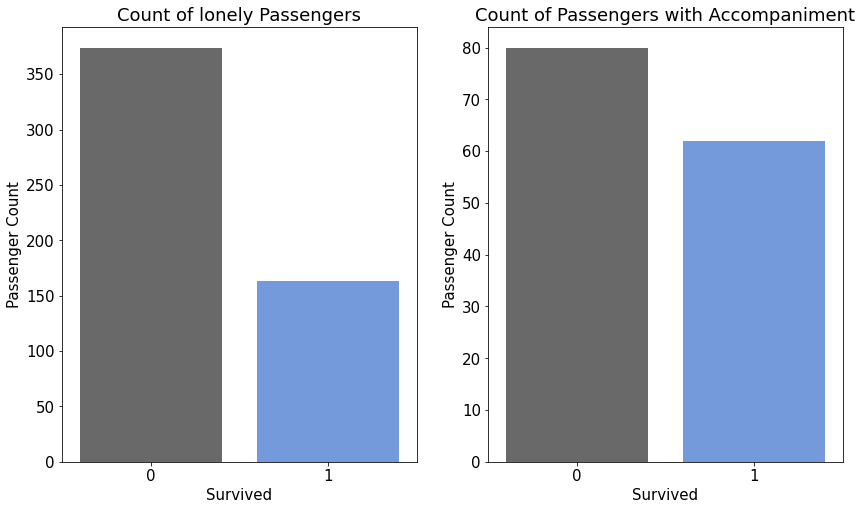

In [13]:
# let's see who's lonely, dfl, l for the lonely and dff, f for family
dfl = df.query('SibSp ==0 & Parch ==0')
dff = df.query('SibSp !=0 & Parch !=0')

# create a countplot of survivors and classes
plt.rcParams['figure.figsize'] = 14, 8
plt.rcParams.update({'font.size': 15})
plt.subplot(1, 2, 1)
ax = sns.countplot(data=dfl, x='Survived', palette=['dimgrey','cornflowerblue'])
plt.title('Count of lonely Passengers')
plt.ylabel('Passenger Count')
plt.xlabel('Survived')
plt.subplot(1, 2, 2)
ax = sns.countplot(data=dff, x='Survived', palette=['dimgrey','cornflowerblue'])
plt.title('Count of Passengers with Accompaniment')
plt.xlabel('Survived')
plt.ylabel('Passenger Count')
plt.show();

**Relatively speaking, passengers with families have a higher chance of surviving than lone occupants. In that case, I would also guess that there were a lot of board personnel among the singles**

## How many Passengers in the Dataset fit the Description of higher Chances of Survival?

In [14]:
df['Age'].describe(), df['Fare'].describe()

(count    714.000000
 mean      29.699118
 std       14.526497
 min        0.420000
 25%       20.125000
 50%       28.000000
 75%       38.000000
 max       80.000000
 Name: Age, dtype: float64,
 count    891.000000
 mean      32.204208
 std       49.693429
 min        0.000000
 25%        7.910400
 50%       14.454200
 75%       31.000000
 max      512.329200
 Name: Fare, dtype: float64)

**To find passengers who fit in our idea of high chances to survive, we have to find passengers who:**
* **Survived**
* **Traveled first class**
* **Are female**
* **Under 29 years old**
* **Didn't travel alone**
* **Spent more than 32 Dollas for their Ticket**

In [15]:
high_prob_survivers = df.query('Survived == 1 & Pclass == 1 & Sex == "female" \
& SibSp != 0 & Parch != 0 & Age < 29 & Fare > 32')
high_prob_survivers

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.000,C23 C25 C27,S
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.000,C23 C25 C27,S
436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.000,B96 B98,S
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C


In [16]:
high_prob_survivers.info(), len(high_prob_survivers), 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 89 to 743
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  5 non-null      int64  
 1   Pclass    5 non-null      int64  
 2   Name      5 non-null      object 
 3   Sex       5 non-null      object 
 4   Age       5 non-null      float64
 5   SibSp     5 non-null      int64  
 6   Parch     5 non-null      int64  
 7   Ticket    5 non-null      object 
 8   Fare      5 non-null      float64
 9   Cabin     5 non-null      object 
 10  Embarked  5 non-null      object 
dtypes: float64(2), int64(4), object(5)
memory usage: 480.0+ bytes


(None, 5)

# Conclusion

**Less than 40% of the passengers survived the Titanic disaster.**

**If you had a 1st class ticket, your chances of survival looked much better. The amount of dollars you spent on your ticket also affected your chances of survival.**

**The boarding to the ship, however, less.**

**If you were a woman, you might have heard the saying "women and children first!" can benefit. If you were from the board staff, you would probably have to help the guests and you had no choice but to die.**

**Your age would also have affected your chances of survival, the fewer years you may have counted, the better off you were. If you had someone by your side who was worth living for, you would have survived more than a lone fighter.**

**Only 5 Passengers fulfill all the criteria.**